In [1]:
import findspark
findspark.init()
findspark.find()

'C:\\spark\\spark-3.0.0-bin-hadoop2.7'

In [2]:
import pyspark as ps
spark = ps.sql.SparkSession.builder \
    .master('local[*]') \
    .appName('homework#4') \
    .getOrCreate()

sc = spark.sparkContext

In [3]:
import numpy as np
import pandas as pd

In [4]:
datas=(sc.textFile("mydata.csv") 
    .map(lambda line: line.split(","))
    .filter(lambda x:x[1]=='KKR')
    .map(lambda x:(x[2],int(x[4])))
    .groupByKey()
    .map(lambda x:(x[0],np.max(list(x[1])),np.min(list(x[1])),np.quantile(list(x[1]),0.25),np.quantile(list(x[1]),0.5),np.quantile(list(x[1]),0.75)))
    .collect())

In [5]:
my_df=pd.DataFrame(datas,columns=['Player','Max_Score','Min_score','Frst_quantile','Median','Last_quantile'])

In [6]:
my_df #Question 3 answer

,Player,Max_Score,Min_score,Frst_quantile,Median,Last_quantile
0,CA Lynn,93,4,16.00,32.0,67.00
1,YK Pathan,59,0,3.00,8.0,16.00
2,SP Narine,54,0,1.00,8.0,30.00
3,RV Uthappa,87,0,2.00,11.0,59.00
4,SA Yadav,31,1,5.50,15.0,23.50
5,C de Grandhomme,36,0,0.00,11.0,29.00
6,UT Yadav,4,2,2.00,2.0,2.50
7,NM Coulter-Nile,6,2,4.00,6.0,6.00
8,DM Bravo,6,6,6.00,6.0,6.00
9,IR Jaggi,28,5,10.75,16.5,22.25


In [7]:
data=(sc.textFile("mydata.csv") 
    .map(lambda line: line.split(","))
    .filter(lambda x:x[1]=='KKR')
    .map(lambda x:(x[2],int(x[4])))
    .groupByKey()
    .map(lambda x:{x[0]:list(x[1])})
    .flatMap(lambda x:x.items())
    .collect()
     ) 
dict1=dict(data)

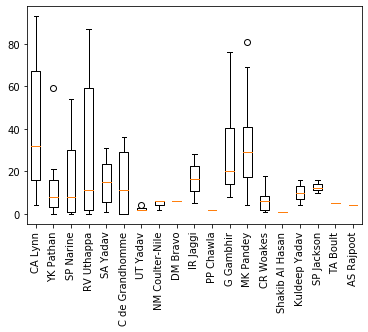

In [8]:
import matplotlib.pyplot as plt
labels, data = dict1.keys(), dict1.values()

plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels,rotation=90)
plt.show()